#📌 Extracão

In [52]:
import pandas as pd

api = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
data = pd.read_json(api)
dict_data = data.to_dict(orient='records')
df_telecom = pd.json_normalize(dict_data, sep='.')

df_telecom.head(5)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


#🔧 Transformação

In [53]:
df_telecom.info()

# Selelected fields:
#   churn
#   customer.gender
#   account.contract
#   customer.SeniorCitizen
#   account.paymentMethod
#   customer.tenure
#   customer.Dependents
#   charges.total

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [54]:
df_telecom_parted = df_telecom.drop(['customerID', 
                                    'phone.PhoneService', 
                                    'phone.MultipleLines', 
                                    'internet.InternetService', 
                                    'internet.OnlineSecurity',
                                    'internet.OnlineBackup',
                                    'internet.DeviceProtection',
                                    'internet.TechSupport',
                                    'internet.StreamingTV',
                                    'internet.StreamingMovies',
                                    'account.PaperlessBilling',
                                    'account.Charges.Monthly'], 
                                    axis=1)

df_telecom_parted.head(5)

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaymentMethod,account.Charges.Total
0,No,Female,0,Yes,Yes,9,One year,Mailed check,593.3
1,No,Male,0,No,No,9,Month-to-month,Mailed check,542.4
2,Yes,Male,0,No,No,4,Month-to-month,Electronic check,280.85
3,Yes,Male,1,Yes,No,13,Month-to-month,Electronic check,1237.85
4,Yes,Female,1,Yes,No,3,Month-to-month,Mailed check,267.4


In [55]:
# Fields to type transform:
#  churn -> int (Yes: 1, No: 0)
#  customer.tenure -> float
#  customer.gender -> int (Male: 1, Female: 0)
#  customer.Dependents -> int (Yes: 1, No: 0)
#  account.paymentMethod -> str
#  account.Charges.Total -> float
#  account.Contract -> str
#  customer.Partner	-> int (Yes: 1, No: 0)

df_telecom_parted['Churn'] = df_telecom_parted['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
df_telecom_parted['customer.gender'] = df_telecom_parted['customer.gender'].apply(lambda x: 1 if x == 'Male' else 0)
df_telecom_parted['customer.Dependents'] = df_telecom_parted['customer.Dependents'].apply(lambda x: 1 if x == 'Yes' else 0)
df_telecom_parted['customer.tenure'] = df_telecom_parted['customer.tenure'].astype(float)
df_telecom_parted['account.Charges.Total'] = df_telecom_parted['account.Charges.Total'].apply(lambda x: x.strip())
df_telecom_parted['account.Charges.Total'] = pd.to_numeric(df_telecom_parted['account.Charges.Total'])
df_telecom_parted['account.PaymentMethod'] = df_telecom_parted['account.PaymentMethod'].convert_dtypes(convert_string=True)
df_telecom_parted['account.Contract'] = df_telecom_parted['account.Contract'].convert_dtypes(convert_string=True)
df_telecom_parted['customer.Partner'] = df_telecom_parted['customer.Partner'].apply(lambda x: 1 if x == 'Yes' else 0)
df_telecom_parted['daily_bill'] = round(df_telecom_parted['account.Charges.Total'] / df_telecom_parted['customer.tenure'] / 30, 2)
df_telecom_parted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Churn                   7267 non-null   int64  
 1   customer.gender         7267 non-null   int64  
 2   customer.SeniorCitizen  7267 non-null   int64  
 3   customer.Partner        7267 non-null   int64  
 4   customer.Dependents     7267 non-null   int64  
 5   customer.tenure         7267 non-null   float64
 6   account.Contract        7267 non-null   string 
 7   account.PaymentMethod   7267 non-null   string 
 8   account.Charges.Total   7256 non-null   float64
 9   daily_bill              7256 non-null   float64
dtypes: float64(3), int64(5), string(2)
memory usage: 567.9 KB


In [56]:
df_telecom_parted.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaymentMethod,account.Charges.Total,daily_bill
0,0,0,0,1,1,9.0,One year,Mailed check,593.30,2.20
1,0,1,0,0,0,9.0,Month-to-month,Mailed check,542.40,2.01
2,1,1,0,0,0,4.0,Month-to-month,Electronic check,280.85,2.34
3,1,1,1,1,0,13.0,Month-to-month,Electronic check,1237.85,3.17
4,1,0,1,1,0,3.0,Month-to-month,Mailed check,267.40,2.97


#📊 Carga e análise

In [57]:
df_telecom_parted.describe()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Charges.Total,daily_bill
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7256.000000,7256.000000
mean,0.257190,0.505711,0.162653,0.484106,0.300124,32.346498,2280.634213,2.158461
std,0.437115,0.500002,0.369074,0.499782,0.458343,24.571773,2268.632997,1.007454
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.800000,0.460000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,400.225000,1.190000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1391.000000,2.340000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,55.000000,3785.300000,3.010000
max,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,8684.800000,4.050000


In [ ]:
churn = df_telecom_parted['Churn'].sum()
non_churn = 7267 - churn
m_customers = df_telecom_parted['customer.gender'].sum()
w_customers = 7267 - m_customers

contracts = df_telecom_parted['account.Contract'].unique().tolist()
payment_methods = df_telecom_parted['account.PaymentMethod'].unique().tolist()
print(f'Contracts: {contracts}\n Payment Methods: {payment_methods}')


Contracts: ['One year', 'Month-to-month', 'Two year']
 Payment Methods: ['Mailed check', 'Electronic check', 'Credit card (automatic)', 'Bank transfer (automatic)']


In [59]:
churn_mensal_contract = df_telecom_parted[df_telecom_parted['account.Contract'] == 'Month-to-month']['Churn'].sum()
churn_one_year_contract = df_telecom_parted[df_telecom_parted['account.Contract'] == 'One year']['Churn'].sum()
churn_two_year_contract = df_telecom_parted[df_telecom_parted['account.Contract'] == 'Two year']['Churn'].sum()
mail_payment_churn = df_telecom_parted[df_telecom_parted['account.PaymentMethod'] == 'Mailed check']['Churn'].sum()
bank_payment_churn = df_telecom_parted[df_telecom_parted['account.PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].sum()
credit_card_payment_churn = df_telecom_parted[df_telecom_parted['account.PaymentMethod'] == 'Credit card (automatic)']['Churn'].sum()
electronic_check_payment_churn = df_telecom_parted[df_telecom_parted['account.PaymentMethod'] == 'Electronic check']['Churn'].sum()

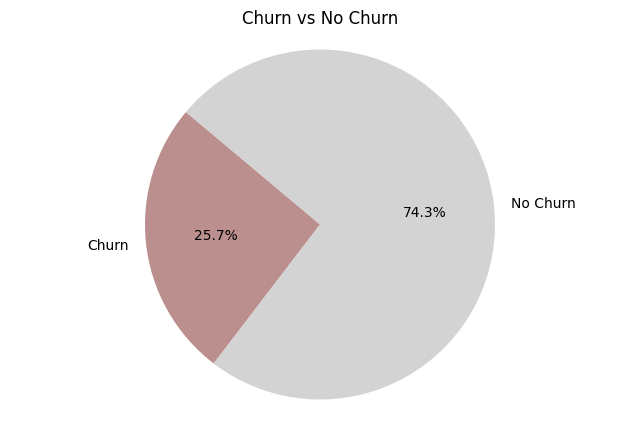

In [60]:
# Churn Distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
labels = ['Churn', 'No Churn']
sizes = [churn, non_churn]
colors = ['#BC8F8F','#D3D3D3']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Churn vs No Churn')
plt.show()

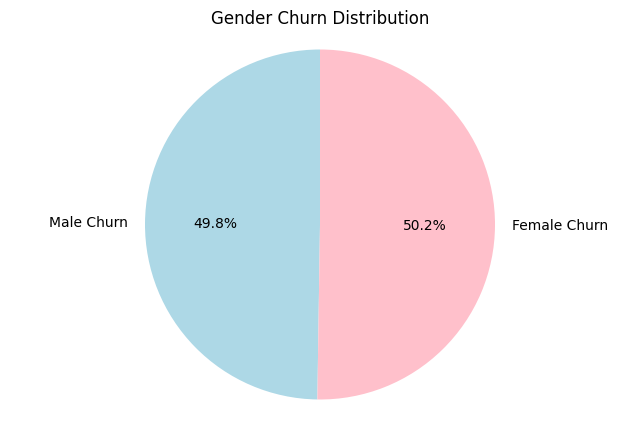

In [61]:
# Gender churn distribution
male_churn = df_telecom_parted[(df_telecom_parted['customer.gender'] == 1) & (df_telecom_parted['Churn'] == 1)].shape[0]
female_churn = df_telecom_parted[(df_telecom_parted['customer.gender'] == 0) & (df_telecom_parted['Churn'] == 1)].shape[0]

plt.figure(figsize=(8,5))
labels = ['Male Churn', 'Female Churn']
sizes = [male_churn, female_churn]
colors = ['#ADD8E6', '#FFC0CB']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')   
plt.title('Gender Churn Distribution')
plt.show()

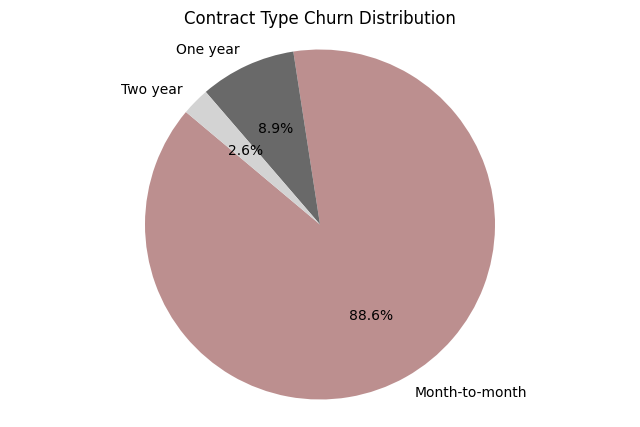

In [62]:
# contract type churn distribution
contract_labels = ['Month-to-month', 'One year', 'Two year']
contract_sizes = [churn_mensal_contract, churn_one_year_contract, churn_two_year_contract]
contract_colors = ['#BC8F8F', '#696969', '#D3D3D3']     
plt.figure(figsize=(8,5))
plt.pie(contract_sizes, labels=contract_labels, colors=contract_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Contract Type Churn Distribution')
plt.show()

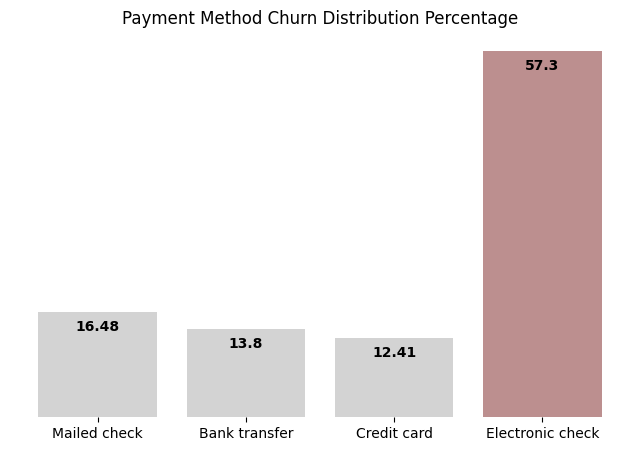

In [63]:
# payment method churn distribution
perc_mail_payment_churn = round((mail_payment_churn / churn) * 100, 2)
perc_bank_payment_churn = round((bank_payment_churn / churn) * 100, 2)
perc_credit_card_payment_churn = round((credit_card_payment_churn / churn) * 100, 2)
perc_electronic_check_payment_churn = round((electronic_check_payment_churn / churn) * 100, 2)

payment_labels = ['Mailed check', 'Bank transfer', 'Credit card', 'Electronic check']
payment_sizes = [perc_mail_payment_churn, perc_bank_payment_churn, perc_credit_card_payment_churn, perc_electronic_check_payment_churn]
payment_colors = ['#D3D3D3', '#D3D3D3', '#D3D3D3', '#BC8F8F']

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(payment_labels, payment_sizes, color=payment_colors)
ax.set_title('Payment Method Churn Distribution Percentage')

for i, v in enumerate(payment_sizes):
    ax.text(i, v - 3, str(v), ha='center', fontweight='bold')

ax.set_frame_on(False)
ax.get_yaxis().set_visible(False)

plt.show()

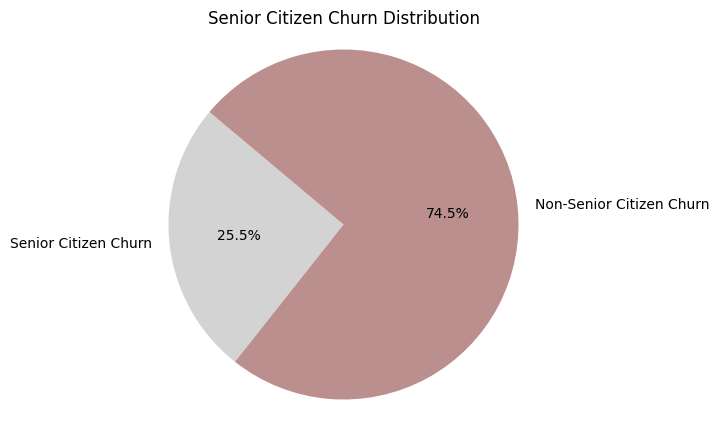

In [64]:
# Senior Citizen churn distribution
senior_churn = df_telecom_parted[(df_telecom_parted['customer.SeniorCitizen'] == 1) & (df_telecom_parted['Churn'] == 1)].shape[0]
non_senior_churn = churn - senior_churn
senior_labels = ['Senior Citizen Churn', 'Non-Senior Citizen Churn']
senior_sizes = [senior_churn, non_senior_churn]
senior_colors = ['#D3D3D3', '#BC8F8F']
plt.figure(figsize=(8,5))
plt.pie(senior_sizes, labels=senior_labels, colors=senior_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Senior Citizen Churn Distribution')
plt.show()

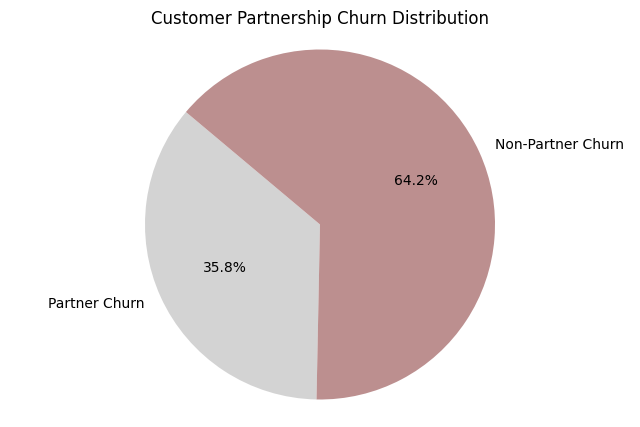

In [65]:
# Customer partnership churn distribution
partner_churn = df_telecom_parted[(df_telecom_parted['customer.Partner'] == 1) & (df_telecom_parted['Churn'] == 1)].shape[0]
non_partner_churn = churn - partner_churn
partner_labels = ['Partner Churn', 'Non-Partner Churn']
partner_sizes = [partner_churn, non_partner_churn]
partner_colors = ['#D3D3D3', '#BC8F8F']
plt.figure(figsize=(8,5))
plt.pie(partner_sizes, labels=partner_labels, colors=partner_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Customer Partnership Churn Distribution')
plt.show()

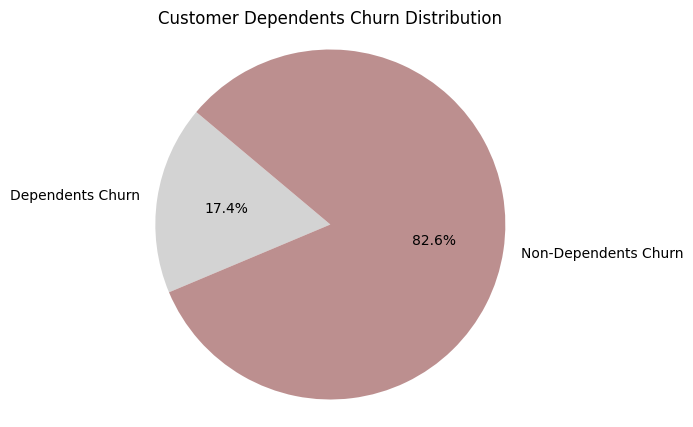

In [66]:
# Customer dependents churn distribution
dependents_churn = df_telecom_parted[(df_telecom_parted['customer.Dependents'] == 1) & (df_telecom_parted['Churn'] == 1)].shape[0]
non_dependents_churn = churn - dependents_churn
dependents_labels = ['Dependents Churn', 'Non-Dependents Churn']
dependents_sizes = [dependents_churn, non_dependents_churn]
dependents_colors = ['#D3D3D3', '#BC8F8F']
plt.figure(figsize=(8,5))
plt.pie(dependents_sizes, labels=dependents_labels, colors=dependents_colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Customer Dependents Churn Distribution')
plt.show()

In [67]:
df_telecom_parted.head()

,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,account.Contract,account.PaymentMethod,account.Charges.Total,daily_bill
0,0,0,0,1,1,9.0,One year,Mailed check,593.30,2.20
1,0,1,0,0,0,9.0,Month-to-month,Mailed check,542.40,2.01
2,1,1,0,0,0,4.0,Month-to-month,Electronic check,280.85,2.34
3,1,1,1,1,0,13.0,Month-to-month,Electronic check,1237.85,3.17
4,1,0,1,1,0,3.0,Month-to-month,Mailed check,267.40,2.97


In [71]:
# Tenure churn distribution
tenure_churn_0_12 = df_telecom_parted[(df_telecom_parted['customer.tenure'] <= 12) & (df_telecom_parted['Churn'] == 1)].shape[0]
tenure_churn_13_24 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 12) & (df_telecom_parted['customer.tenure'] <= 24) & (df_telecom_parted['Churn'] == 1)].shape[0]
tenure_churn_25_36 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 24) & (df_telecom_parted['customer.tenure'] <= 36) & (df_telecom_parted['Churn'] == 1)].shape[0]
tenure_churn_37_42 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 36) & (df_telecom_parted['customer.tenure'] <= 42) & (df_telecom_parted['Churn'] == 1)].shape[0]

# Tenure non-churn distribution
tenure_non_churn_0_12 = df_telecom_parted[(df_telecom_parted['customer.tenure'] <= 12) & (df_telecom_parted['Churn'] == 0)].shape[0]
tenure_non_churn_13_24 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 12) & (df_telecom_parted['customer.tenure'] <= 24) & (df_telecom_parted['Churn'] == 0)].shape[0]
tenure_non_churn_25_36 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 24) & (df_telecom_parted['customer.tenure'] <= 36) & (df_telecom_parted['Churn'] == 0)].shape[0]
tenure_non_churn_37_42 = df_telecom_parted[(df_telecom_parted['customer.tenure'] > 36) & (df_telecom_parted['customer.tenure'] <= 42) & (df_telecom_parted['Churn'] == 0)].shape[0]

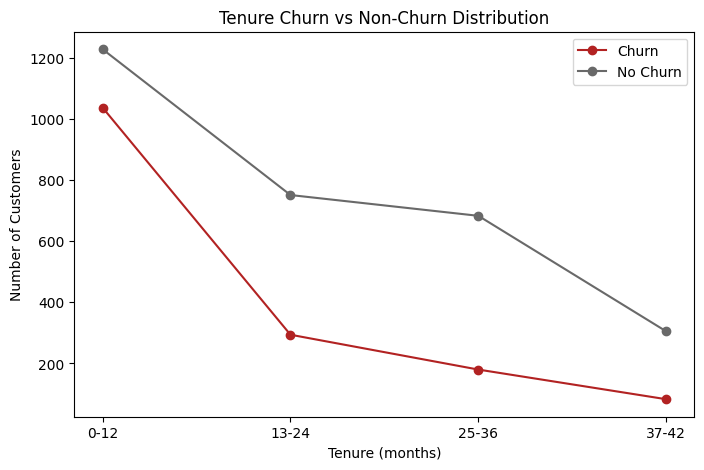

In [ ]:
# Tenure churn vs non-churn line chart

# Define the tenure bins
tenure_bins = ['0-12', '13-24', '25-36', '37-42']

# Create a list of churn and non-churn counts for each bin
churn_counts = [tenure_churn_0_12, tenure_churn_13_24, tenure_churn_25_36, tenure_churn_37_42]
non_churn_counts = [tenure_non_churn_0_12, tenure_non_churn_13_24, tenure_non_churn_25_36, tenure_non_churn_37_42]

# Plot the line chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tenure_bins, churn_counts, marker='o', label='Churn', color='#B22222')
ax.plot(tenure_bins, non_churn_counts, marker='o', label='No Churn', color='#696969')
ax.set_title('Tenure Churn vs Non-Churn Distribution')
ax.set_xlabel('Tenure (months)')
ax.set_ylabel('Number of Customers')
ax.legend()

plt.show()

In [ ]:
# Setting maximum value of account charges total
account_charges = df_telecom_parted['account.Charges.Total'].max()
print(account_charges) # 8684.8 -> Divide into bins of 0-2000, 2001-4000, 4001-6000, 6001-8000, 8001-9000

8684.8


In [87]:
# Account Charges Total churn and non-churn distribution
charges_churn_0_2000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] <= 2000) & (df_telecom_parted['Churn'] == 1)].shape[0]
charges_churn_2001_4000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 2000) & (df_telecom_parted['account.Charges.Total'] <= 4000) & (df_telecom_parted['Churn'] == 1)].shape[0]
charges_churn_4001_6000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 4000) & (df_telecom_parted['account.Charges.Total'] <= 6000) & (df_telecom_parted['Churn'] == 1)].shape[0]
charges_churn_6001_8000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 6000) & (df_telecom_parted['account.Charges.Total'] <= 8000) & (df_telecom_parted['Churn'] == 1)].shape[0]
charges_churn_8001_9000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 8000) & (df_telecom_parted['account.Charges.Total'] <= 9000) & (df_telecom_parted['Churn'] == 1)].shape[0]

charges_non_churn_0_2000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] <= 2000) & (df_telecom_parted['Churn'] == 0)].shape[0]
charges_non_churn_2001_4000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 2000) & (df_telecom_parted['account.Charges.Total'] <= 4000) & (df_telecom_parted['Churn'] == 0)].shape[0]
charges_non_churn_4001_6000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 4000) & (df_telecom_parted['account.Charges.Total'] <= 6000) & (df_telecom_parted['Churn'] == 0)].shape[0]
charges_non_churn_6001_8000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 6000) & (df_telecom_parted['account.Charges.Total'] <= 8000) & (df_telecom_parted['Churn'] == 0)].shape[0]
charges_non_churn_8001_9000 = df_telecom_parted[(df_telecom_parted['account.Charges.Total'] > 8000) & (df_telecom_parted['account.Charges.Total'] <= 9000) & (df_telecom_parted['Churn'] == 0)].shape[0]


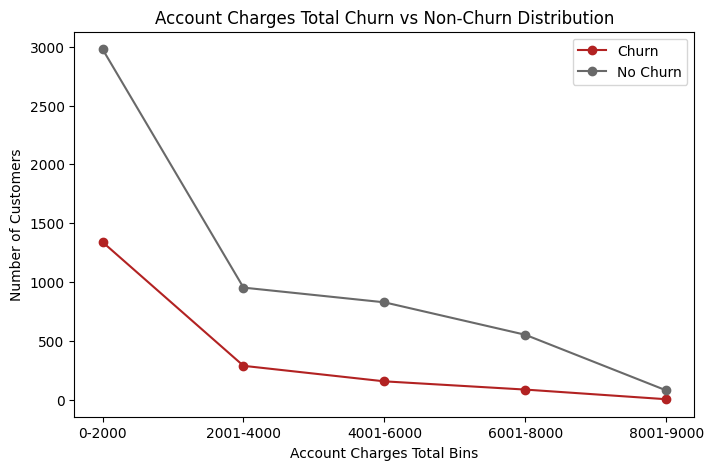

In [88]:
# Account charges total churn vs non-churn line chart

charges_bins = ['0-2000', '2001-4000', '4001-6000', '6001-8000', '8001-9000']
churn_counts = [charges_churn_0_2000, charges_churn_2001_4000, charges_churn_4001_6000, charges_churn_6001_8000, charges_churn_8001_9000]
non_churn_counts = [charges_non_churn_0_2000, charges_non_churn_2001_4000, charges_non_churn_4001_6000, charges_non_churn_6001_8000, charges_non_churn_8001_9000]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(charges_bins, churn_counts, marker='o', label='Churn', color='#B22222')
ax.plot(charges_bins, non_churn_counts, marker='o', label='No Churn', color='#696969')
ax.set_title('Account Charges Total Churn vs Non-Churn Distribution')
ax.set_xlabel('Account Charges Total Bins')
ax.set_ylabel('Number of Customers')
ax.legend()
plt.show()

In [90]:
# Daily Bill analysis
max_daily_bill = df_telecom_parted['daily_bill'].max()
mean_daily_bill = df_telecom_parted['daily_bill'].mean()
print(f'Daily Bill\n mean: {mean_daily_bill} \n max: {max_daily_bill}') # 4,05 -> Bins of 0-1, 1.01-2, 2.01-3, 3.01-4, 4.01-5

Daily Bill
 mean: 2.1584605843439912 
 max: 4.05


In [91]:
# Daily bill and churn
daily_bill_churn_0_1 = df_telecom_parted[(df_telecom_parted['daily_bill'] <= 1) & (df_telecom_parted['Churn'] == 1)].shape[0]
daily_bill_churn_1_2 = df_telecom_parted[(df_telecom_parted['daily_bill'] > 1) & (df_telecom_parted['daily_bill'] <= 2) & (df_telecom_parted['Churn'] == 1)].shape[0]
daily_bill_churn_2_3 = df_telecom_parted[(df_telecom_parted['daily_bill'] > 2) & (df_telecom_parted['daily_bill'] <= 3) & (df_telecom_parted['Churn'] == 1)].shape[0]
daily_bill_churn_3_4 = df_telecom_parted[(df_telecom_parted['daily_bill'] > 3) & (df_telecom_parted['daily_bill'] <= 4) & (df_telecom_parted['Churn'] == 1)].shape[0]
daily_bill_churn_4_5 = df_telecom_parted[(df_telecom_parted['daily_bill'] > 4) & (df_telecom_parted['daily_bill'] <= 5) & (df_telecom_parted['Churn'] == 1)].shape[0]

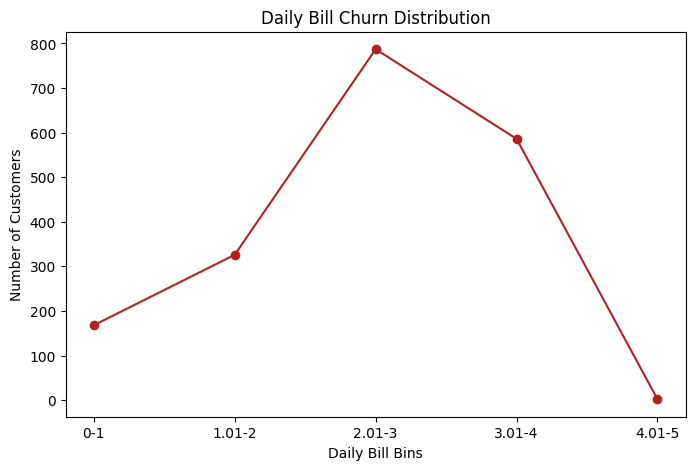

In [92]:
# Daily bill vs churn line chart
daily_bill_bins = ['0-1', '1.01-2', '2.01-3', '3.01-4', '4.01-5']
daily_bill_churn_counts = [daily_bill_churn_0_1, daily_bill_churn_1_2, daily_bill_churn_2_3, daily_bill_churn_3_4, daily_bill_churn_4_5]
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(daily_bill_bins, daily_bill_churn_counts, marker='o', label='Churn', color='#B22222')
ax.set_title('Daily Bill Churn Distribution')
ax.set_xlabel('Daily Bill Bins')
ax.set_ylabel('Number of Customers')
plt.show()

#📄Relatorio Final

# 📊 Churn Analysis Report: TelecomX

## 🧭 Introduction
### The objective of this analysis is to identify the main factors that lead TelecomX customers to cancel their services (Churn).  
#### - Customer churn is a critical problem that directly impacts the company’s revenue and growth.  
#### - Through the analysis of historical data, we seek to understand the profile of customers who churn.  
#### - To provide support for more effective retention strategies.

<br>
<br>

## 🧹 Data Cleaning and Processing
### The data were extracted from an API in JSON format and went through a rigorous transformation process:
#### **Import and Normalization**  
#####  - Nested data were converted into a Pandas DataFrame using `json_normalize`.

<br>
<br>

## 🧩 Attribute Selection  
###  - Key variables: gender, contract tenure, senior citizen status, payment method, dependents, and total charges.

<br>
<br>

## 🔢 Type Conversion 
### Categorical variables (Churn, gender, Partner, Dependents) → binary (0 and 1).  
###  - `account.Charges.Total` → whitespace cleanup and conversion to `float`.  
###  - Text fields → standardized as `string`.

<br>
<br>

## 🛠️ Data Engineering
###  - Creation of the **daily_bill** metric, normalizing the service cost per customer.

<br>
<br>

## 🔍 Exploratory Data Analysis
### The analysis revealed significant patterns:
#### - **Churn Distribution**  
#####  - Approximately **25.7%** of the customer base churned.

<br>
<br>

## 👥 Demographic Profile  
###  - Balanced gender distribution (≈ 50.5% men).  
###  - Only **16.2%** are senior citizens.

<br>
<br>

## ⏳ Tenure Factors  
###  - Customers with shorter tenure show higher churn rates.

### Service Cost  
####  - Average daily bill: **2.15** monetary units.  
####  - Daily bills in the range of 2 to 3 monetary units → higher propensity to churn.

<br>
<br>

## 📝 Contract and Payment Impact  
###  - **Month-to-month** contracts and the use of **Electronic Check** are correlated with higher churn rates.

<br>
<br>

## 🧠 Conclusions and Insights
### Short-Term Vulnerability  
####  - The initial contract period is the most critical; after the first few months, the probability of churn decreases.

### Price Sensitivity  
####  - Daily cost is a relevant predictor of churn.

### Family Relationships  
####  - Customers with dependents or partners tend to show higher loyalty.

<br>
<br>

## 🧩 Recommendations
### Based on the findings, the following actions are suggested:
<br>

#### 📆 Incentives for Long-Term Contracts  
#####  - Promotions to migrate customers from month-to-month plans to annual or biannual plans.
<br>

#### 🎁 Welcome Programs  
#####  - Focus CS (Customer Success) efforts on the first **6 months** of the contract.
<br>

#### 💳 Payment Method Review  
#####  - Investigate the impact of **Electronic Check** and encourage automatic debit.
<br>

#### 👴 Offers for Senior Citizens  
#####  - Develop specific packages for this audience.
